In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

from context import clustering, findendpoints, filterbythreshold, memorystorage, get_environment_percentile

In [2]:
import pathlib, os
_file_path = pathlib.Path(__file__).parent.absolute()

test_dir = os.path.join(_file_path, '../apx-resources/auth/')
test_cases = json.load(open(test_dir + 'testCases.json', 'r'))
storage = memorystorage.MemoryStorage()
approaches = {
    'Clustering': clustering.Clusterer(storage),
    'Endpoint Finding': findendpoints.EndpointFinder(storage),
    'Filter By Threshold': filterbythreshold.Filterer(storage)
}
error_map = {}

for name, detector in approaches.items():
    print('Running Method: {}'.format(name))
    errors = []
    for case in test_cases:
        threshold = get_environment_percentile(test_dir + case['ambUri'])
        id = storage.create_evaluation(threshold, '')
        audio, sr = sf.read(test_dir + case['speechUri'])
        duration = detector.measure(audio, sr, id, '')
        errors.append(abs(duration - case['speechDuration']))   
    error_map[name] = errors

Running Method: Clustering
Running Method: Endpoint Finding
Running Method: Filter By Threshold


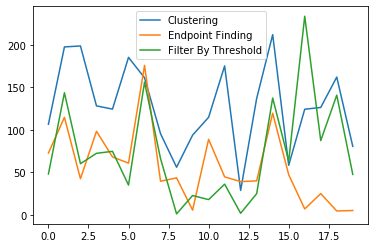

In [3]:
for name, results in error_map.items():
    plt.plot(results, label=name)
plt.legend()
plt.show()

In [4]:
for name, results in error_map.items():
    print('Mean Error for {}: {}'.format(name, np.mean(results)))

Mean Error for Clustering: 128.41029251700678
Mean Error for Endpoint Finding: 57.19830158730163
Mean Error for Filter By Threshold: 73.61975056689343
